In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [19]:
def calculate_hs(freqs):
    return - np.sum(freqs * np.log2(freqs))

def calculate_hg():
    """Calculate $H_g$ [bits per base]"""
    freqs = np.array([.25, .25, .25, .25])
    return calculate_hs(freqs)


In [21]:
calculate_hg()

2.0

In [4]:
def calculate_Rsequence_for_position(freqs):
    return calculate_hg() - calculate_hs(freqs)

def calculate_Rsequence_for_position_using_equaly_likely_characters(freq):
    # the original formula is 
    # R_{iw}(b,l) = 2 - (-log_2f(b,l) + e(n(l))) [bits per base]
    # omitting correction factor and two negative signs
    return calculate_hg() + math.log2(freq)

In [23]:
#freqs = {'A':.999, 'C':.0001, 'G':.0008, 'T':.0001}
freqs = np.array([.999, .0001, .0008, .0001])
print(calculate_Rsequence_for_position(freqs))
print([calculate_Rsequence_for_position_using_equaly_likely_characters(base) for base in freqs])

1.9876703141676515
[1.9985565831303314, -11.287712379549449, -8.287712379549449, -11.287712379549449]


In [24]:
calculate_hs(freqs)

0.0123296858323485

In [25]:
def approximate_correction_factor(s=4, n=100):
    """Calculate approximate correction factor. Equation 16 in Schneider et al.
    
    :param s: number of symbols in alphabet - 4 for DNA (A,C,G,T)
    :param n: number of sample sequences used to calculate R_{sequence} and create R_{iw} matrix
    """
    return calculate_hg() - ((s-1) / (2*math.log(2) * n))

In [61]:
def calculate_Rsequence(freqs, n=100):
    E_H_nb = approximate_correction_factor(s=freqs.shape[1], n=n)
    return sum([E_H_nb - calculate_hs(freqs[i]) for i in range(len(freqs))])    

In [60]:
freqs = np.array([[.9, .1, 10e-10, 10e-10], [.9, .1, 10e-10, 10e-10], [.9, .1, 10e-10, 10e-10], [.9, .1, 10e-10, 10e-10]])
calculate_Rsequence(other)

6.037455684010714

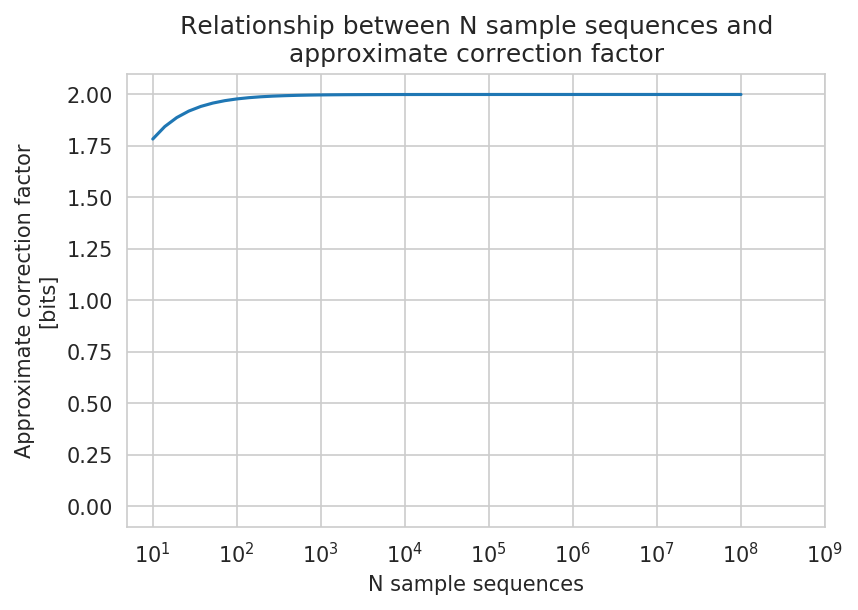

In [59]:
fig, ax = plt.subplots(dpi=150)
x = np.logspace(1, 8)
y = np.apply_along_axis(lambda x: approximate_correction_factor(s=4, n=x), 0, x)
ax.plot(x, y)
ax.set(title='Relationship between N sample sequences and\napproximate correction factor', 
       xscale='log', xlabel='N sample sequences', xlim=[5, 10e8], 
       ylabel='Approximate correction factor\n[bits]', ylim=[-.1, 2.1]);